<h1 style="color:#DE006F">IMPORTING LIBRARIES</h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.shape

(400, 3)

<h1 style="color:#DE006F">TRAIN, TEST AND SPLIT</h1>

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],
                                              test_size=0.5,
                                              random_state=42)
X_train.shape
X_test.shape

(200, 2)

<h1 style="color:#DE006F">STANDARD SCALER</h1>

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit() method calculates the mean and standard deviation for each feature (column) 
scaler.fit(X_train)

#transform train and test sets
X_train_scaled= scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [74]:
X_train
#is a dataframe

,Age,EstimatedSalary
183,33,43000
203,41,71000
283,52,21000
211,52,150000
282,37,70000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [9]:
#X_train_scaled
#is a numpy array

In [76]:
#converting numpy array into dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

<h1 style="color:#DE006F">CHECKING THE MEAN AND STD BEFORE SCALING</h1>

In [77]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,200.0,200.0
mean,37.6,68940.0
std,10.3,32914.9
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,69500.0
75%,45.0,86250.0
max,60.0,150000.0


<h1 style="color:#DE006F">CHECKING THE MEAN AND STD AFTER SCALING</h1>

In [78]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,200.0,200.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.5


<h1 style="color:#DE006F">EFFECT OF SCALING</h1>

<h2>PLOT-SCATTERPLOT</h2>

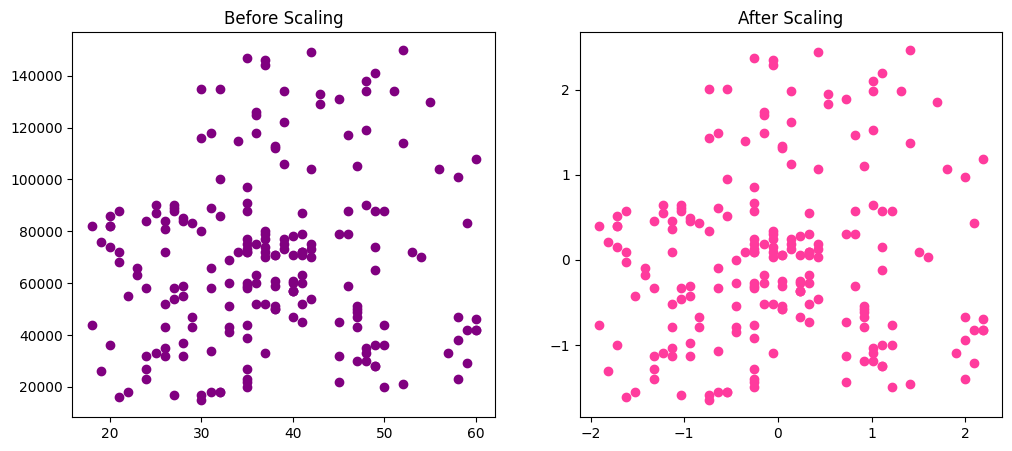

In [79]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='purple')
ax1.set_title('Before Scaling')

#after scaling
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='#FF3B9D')
ax2.set_title('After Scaling')

plt.show()

 <h2>PLOT-Kernel Density Estimation (KDE) curves</h2>

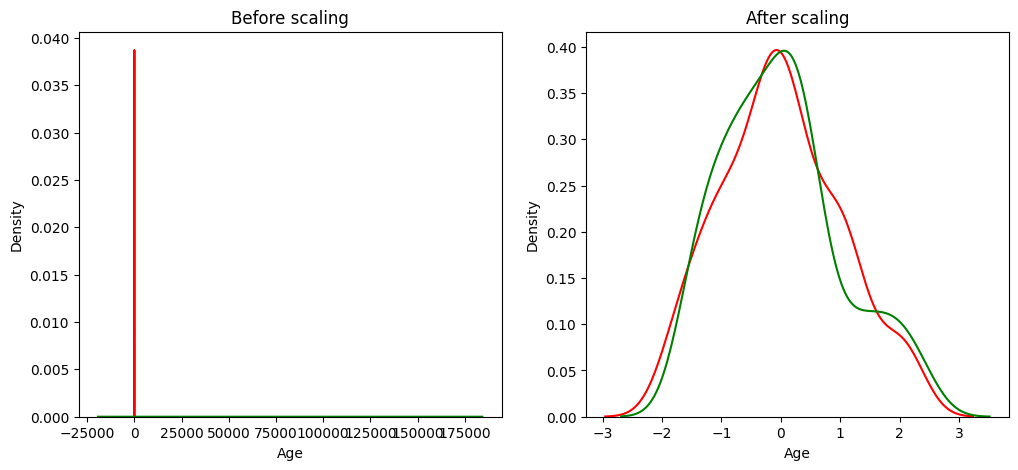

In [80]:
fig, (ax1, ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling:
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1,color="red")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1,color="green")

#after scaling:
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2,color="red")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,color='green')
plt.show()

<H1 style="color:#DE006F">WHY IS SCALING IMPORTANT</H1>

In [81]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [82]:
# Train Logistic Regression on unscaled data
lr.fit(X_train,y_train)

# Train Logistic Regression on scaled data
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [83]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.85
Scaled 0.85
